In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


df=pd.read_csv('/content/drive/MyDrive/PTDataScience/assignments/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [20]:
# checking for duplicate entries

duplicateRows = df[df.duplicated()]
print(duplicateRows)

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []


In [21]:
# check for inconsistiences in the label in this column

df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [22]:
# check for inconsistiences in the label in this column

df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [23]:
# check for inconsistiences in the label in this column

df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [24]:
# check for inconsistiences in the label in this column

df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [25]:
#replace missing Item_Weight with 0. Since there is not way to know the weights and the column may be valuable in the future.


df['Item_Weight'].fillna(value=0, inplace=True)

In [26]:
#replace missing Item_Weight with 0. Since there is not way to know the weights and the column may be valuable in the future.


df['Outlet_Size'].fillna(value= 'Not Known', inplace=True)

In [27]:
#check to see that the replace done above worked

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [28]:
# replace -  normalize the labels in the Item_Fat_Content column

df['Item_Fat_Content'].replace('LF','Low Fat',inplace =True)
df['Item_Fat_Content'].replace('reg','Regular',inplace =True)
df['Item_Fat_Content'].replace('low fat','Low Fat',inplace =True)

df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [29]:
# sales by Store and Item

df.groupby(['Outlet_Identifier', 'Item_Identifier'])[['Item_Outlet_Sales']].sum()

Item_Outlet_Sales
Outlet_Identifier Item_Identifier                   
OUT010            DRA12                     283.6308
                  DRA24                     327.5736
                  DRA59                     185.0924
                  DRB13                     948.7650
                  DRB25                     214.3876
...                                              ...
OUT049            NCZ18                    5580.7356
                  NCZ30                    2530.7058
                  NCZ42                    4740.4960
                  NCZ53                    3956.8494
                  NCZ54                    7148.0288

[8523 rows x 1 columns]

In [30]:
# sales by item and Store

df.groupby(['Item_Identifier','Outlet_Identifier'])[['Item_Outlet_Sales']].sum()


Item_Outlet_Sales
Item_Identifier Outlet_Identifier                   
DRA12           OUT010                      283.6308
                OUT013                     2552.6772
                OUT017                     2552.6772
                OUT018                      850.8924
                OUT035                      992.7078
...                                              ...
NCZ54           OUT019                      162.4552
                OUT027                     5523.4768
                OUT045                     2274.3728
                OUT046                     4711.2008
                OUT049                     7148.0288

[8523 rows x 1 columns]

In [31]:
# Sales by store
# sales by item and Store

df.groupby(['Outlet_Identifier'])[['Item_Outlet_Sales']].sum()

,Item_Outlet_Sales
Outlet_Identifier,
OUT010,1.883402e+05
OUT013,2.142664e+06
OUT017,2.167465e+06
OUT018,1.851823e+06
OUT019,1.796941e+05
OUT027,3.453926e+06
OUT035,2.268123e+06
OUT045,2.036725e+06
OUT046,2.118395e+06


In [32]:
# sales by outlet type

df.groupby(['Outlet_Type'])[['Item_Outlet_Sales']].sum()

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,3.680343e+05
Supermarket Type1,1.291734e+07
Supermarket Type2,1.851823e+06
Supermarket Type3,3.453926e+06


# **PROJECT 1 - PART 3**

## Sales by item type

No handles with labels found to put in legend.


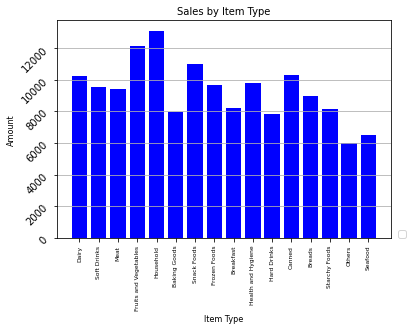

In [35]:
plt.bar(df['Item_Type'], df['Item_Outlet_Sales'], color='blue',);

plt.xticks(rotation = 90,fontsize = 6);
plt.yticks(rotation = 45);
plt.xlabel('Item Type', fontsize=8)
plt.ylabel('Amount', fontsize= 8)
plt.title('Sales by Item Type', fontsize = 10)
plt.legend(loc=(1.02,0));
plt.grid(axis = 'y')

## Sales by item

In [56]:
top20ItemsFilter = df.groupby(['Item_Identifier'])['Item_Outlet_Sales'].sum().sort_values(ascending = False).head(20)
top20ItemsFilter

Item_Identifier
FDY55    42661.8008
FDA15    41584.5364
FDZ20    40185.0248
FDF05    36555.7490
FDA04    35741.4756
FDK03    34843.9772
NCQ06    34680.1904
NCQ53    34508.4140
FDJ55    33531.0196
FDD44    32723.4042
FDD29    32469.7344
FDC17    31979.7056
FDT21    31873.1776
FDK40    31821.9110
FDI50    31377.8224
FDN58    31279.2840
FDO37    30958.3684
FDL58    30584.1888
FDQ52    30546.2382
FDT07    30247.2940
Name: Item_Outlet_Sales, dtype: float64

No handles with labels found to put in legend.


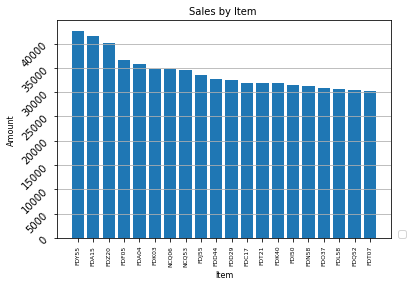

In [58]:
plt.bar(top20ItemsFilter.index,top20ItemsFilter.values)

plt.xticks(rotation = 90,fontsize = 6);
plt.yticks(rotation = 45);
plt.xlabel('Item', fontsize=8)
plt.ylabel('Amount', fontsize= 8)
plt.title('Sales by Item ', fontsize = 10)
plt.legend(loc=(1.02,0));
plt.grid(axis = 'y')

## Sales by Store

In [69]:

top20storeFilter = pd.DataFrame(df.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].sum().sort_values(ascending = False).head(20)).reset_index()
top20storeFilter

,Outlet_Identifier,Item_Outlet_Sales
0,OUT027,3.453926e+06
1,OUT035,2.268123e+06
2,OUT049,2.183970e+06
3,OUT017,2.167465e+06
4,OUT013,2.142664e+06
5,OUT046,2.118395e+06
6,OUT045,2.036725e+06
7,OUT018,1.851823e+06
8,OUT010,1.883402e+05
9,OUT019,1.796941e+05


## Sales by Outlet 

### method 1

No handles with labels found to put in legend.


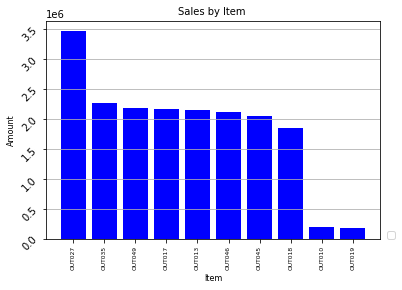

In [71]:
plt.bar(top20storeFilter['Outlet_Identifier'], top20storeFilter['Item_Outlet_Sales'], color='blue',);

plt.xticks(rotation = 90,fontsize = 6);
plt.yticks(rotation = 45);
plt.xlabel('Item', fontsize=8)
plt.ylabel('Amount', fontsize= 8)
plt.title('Sales by Item ', fontsize = 10)
plt.legend(loc=(1.02,0));
plt.grid(axis = 'y')

## Sales by Outlet 

### method 2

No handles with labels found to put in legend.


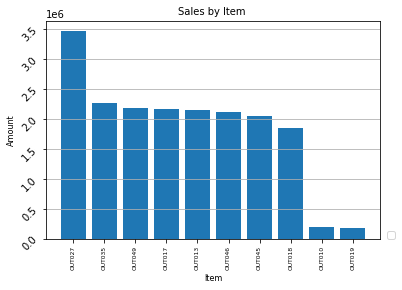

In [53]:
plt.bar(top20storeFilter.index,top20storeFilter.values)

plt.xticks(rotation = 90,fontsize = 6);
plt.yticks(rotation = 45);
plt.xlabel('Item', fontsize=8)
plt.ylabel('Amount', fontsize= 8)
plt.title('Sales by Item ', fontsize = 10)
plt.legend(loc=(1.02,0));
plt.grid(axis = 'y')

## Sales by fat content

In [75]:
top20FatItemsFilter = df.groupby(['Item_Fat_Content'])['Item_Outlet_Sales'].sum().sort_values(ascending = False).head(20)
top20FatItemsFilter

Item_Fat_Content
Low Fat    1.190409e+07
Regular    6.687031e+06
Name: Item_Outlet_Sales, dtype: float64

No handles with labels found to put in legend.


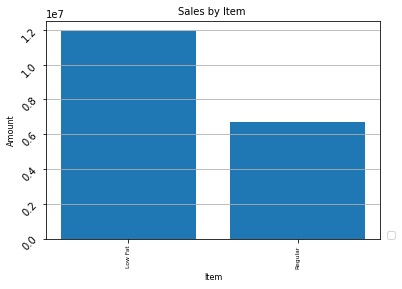

In [78]:
plt.bar(top20FatItemsFilter.index,top20FatItemsFilter.values)

plt.xticks(rotation = 90,fontsize = 6);
plt.yticks(rotation = 45);
plt.xlabel('Item', fontsize=8)
plt.ylabel('Amount', fontsize= 8)
plt.title('Sales by Item ', fontsize = 10)
plt.legend(loc=(1.02,0));
plt.grid(axis = 'y')